In [1]:
import json
import os
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [2]:
root_dir = Path.cwd().parent
data_dir = os.path.join(root_dir, "playwright/axeResults")

In [3]:
with open(os.path.join(data_dir, '00-summary.json'), 'r') as summary_file:
    # print(summary_file.read())
    text = summary_file.read()
    summary = json.loads(text)

In [4]:
summary_compiled = []
for listing in summary:
    # summary_compiled['Title'].append(listing['title'])
    compiled = {
        'Title': listing['title'],
        'Total Violations': listing['violationCount'],
        'Minor': 0, 
        'Moderate': 0,
        'Serious': 0,
        'Critical': 0,
    }
    for violation in listing['violations']:
        if violation['impact'] == 'minor':
            # compiled['Violations'].append('Minor')
            # compiled['y'][0] += 1
            compiled['Minor'] += 1
        if violation['impact'] == 'moderate':
            # compiled['Violations'].append('Moderate')
            # compiled['y'][1] += 1
            compiled['Moderate'] += 1
        if violation['impact'] == 'serious':
            # compiled['Violations'].append('Serious')
            # compiled['y'][2] += 1
            compiled['Serious'] += 1
        if violation['impact'] == 'critical':
            # compiled['Violations'].append('Critical')
            # compiled['y'][3] += 1
            compiled['Critical'] += 1
    summary_compiled.append(compiled)
summary_compiled

[{'Title': 'iGrad',
  'Total Violations': 2,
  'Minor': 1,
  'Moderate': 0,
  'Serious': 1,
  'Critical': 0},
 {'Title': 'Academic Suspension Appeal',
  'Total Violations': 3,
  'Minor': 0,
  'Moderate': 3,
  'Serious': 0,
  'Critical': 0},
 {'Title': 'RamPort-Academics',
  'Total Violations': 9,
  'Minor': 1,
  'Moderate': 4,
  'Serious': 2,
  'Critical': 2},
 {'Title': 'SSB - Aid Year',
  'Total Violations': 3,
  'Minor': 0,
  'Moderate': 3,
  'Serious': 0,
  'Critical': 0},
 {'Title': 'Transcript Request | Parchment',
  'Total Violations': 6,
  'Minor': 1,
  'Moderate': 3,
  'Serious': 2,
  'Critical': 0},
 {'Title': 'RamPort - Campus Life',
  'Total Violations': 10,
  'Minor': 1,
  'Moderate': 4,
  'Serious': 3,
  'Critical': 2},
 {'Title': 'Catalog Term',
  'Total Violations': 4,
  'Minor': 0,
  'Moderate': 3,
  'Serious': 0,
  'Critical': 1},
 {'Title': 'Current Applications and Surveys',
  'Total Violations': 3,
  'Minor': 0,
  'Moderate': 3,
  'Serious': 0,
  'Critical': 0},
 {

In [5]:
df = pd.DataFrame(summary_compiled)
df

,Title,Total Violations,Minor,Moderate,Serious,Critical
0,iGrad,2,1,0,1,0
1,Academic Suspension Appeal,3,0,3,0,0
2,RamPort-Academics,9,1,4,2,2
3,SSB - Aid Year,3,0,3,0,0
4,Transcript Request | Parchment,6,1,3,2,0
5,RamPort - Campus Life,10,1,4,3,2
6,Catalog Term,4,0,3,0,1
7,Current Applications and Surveys,3,0,3,0,0
8,Dashboard,5,1,4,0,0
9,Emergency Loan Application,3,0,3,0,0


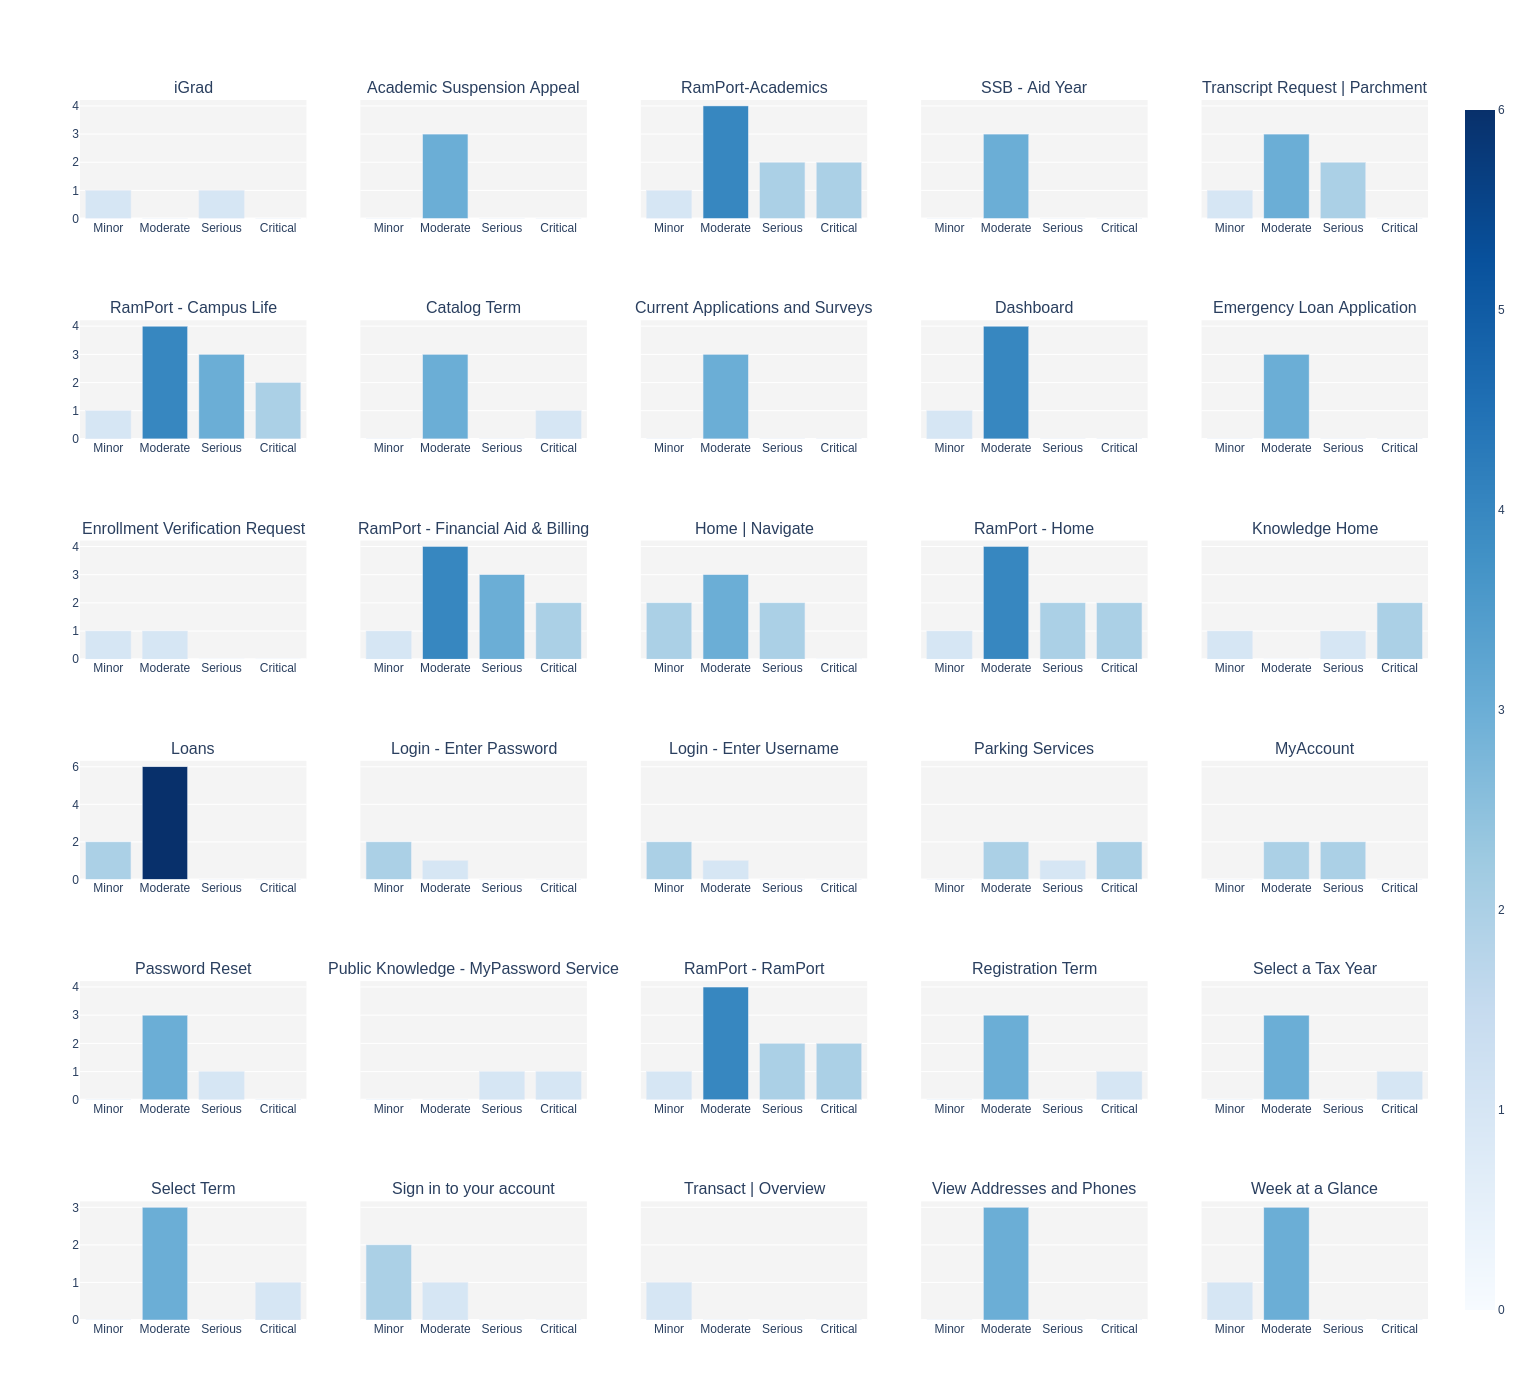

In [29]:
titles = []
for entry in summary_compiled:
    titles.append(entry['Title'])

fig = make_subplots(rows=6, cols=5, subplot_titles=titles, shared_yaxes=True)

j = 1
k = 1
for i in range(len(summary_compiled)):
    k += 1
    if i % 5 == 0:
        # j += 1
        j = (i // 5) + 1
        k = 1

    fig.add_trace(go.Bar(
        x=["Minor", "Moderate", "Serious", "Critical"],
        y=[summary_compiled[i]["Minor"], summary_compiled[i]["Moderate"], summary_compiled[i]["Serious"], summary_compiled[i]["Critical"]],
        marker=dict(
            color=[summary_compiled[i]["Minor"], summary_compiled[i]["Moderate"], summary_compiled[i]["Serious"], summary_compiled[i]["Critical"]],
            coloraxis="coloraxis"
        ),
    ), row=j,col=k)
fig.update_layout(height=1400, width=1400, coloraxis=dict(colorscale="Blues"), showlegend=False, plot_bgcolor="#f4f4f4")